# Introdução à Aula de Métodos Baseados em Otimização

## Objetivos da Aula
- Compreender os fundamentos dos **Métodos de Otimização** aplicados em Machine Learning.
- Focar em dois métodos essenciais: **Support Vector Machine (SVM)** e **Redes Neurais (Perceptron)**.


## Objetivos Específicos
1. **Entender SVM:**
   - Compreender o conceito de margens e hiperplanos em SVM.
   - Explorar diferentes tipos de SVM, incluindo o uso de kernel trick.
   - Analisar exemplos práticos para entender sua aplicação.

2. **Aprofundar em Redes Neurais e Perceptron:**
   - Entender a estrutura básica e o funcionamento de uma rede neural.
   - Explorar o modelo do Perceptron, incluindo suas limitações.
   - Aplicar o conceito de Perceptron em um exemplo prático.

3. **Aplicações Práticas:**
   - Utilizar o Python e bibliotecas relevantes para implementar esses métodos.
   - Analisar e interpretar os resultados obtidos através desses modelos.

# Revisão Rápida: Conceitos-chave de Métodos Preditivos

## Conceitos Importantes
1. **Classificação vs. Regressão:**
   - **Classificação**: Predição de categorias discretas (ex: classificar emails em 'spam' ou 'não spam').
   - **Regressão**: Predição de valores contínuos (ex: prever o preço de uma casa).

2. **Métodos Baseados em Distância (kNN):**
   - Princípio de funcionamento baseado na proximidade entre os pontos de dados.
   - Uso de 'k' vizinhos mais próximos para a tomada de decisão.

3. **Métodos Probabilísticos (Naive Bayes):**
   - Baseado em probabilidades e o Teorema de Bayes.
   - Eficiente para grandes volumes de dados.

4. **Árvores de Decisão (ID3, Random Forest):**
   - Estrutura de árvore para representar decisões e suas possíveis consequências.
   - Random Forest: conjunto de árvores para melhorar a precisão.

# Support Vector Machine (SVM) - Conceitos Fundamentais

## O que é SVM?
O SVM é um poderoso método de aprendizagem supervisionada utilizado tanto para classificação quanto para regressão. Mas, principalmente, é usado em problemas de classificação.

## Conceitos Chave
1. **Hiperplano:**
   - Um hiperplano é uma linha de decisão que separa um conjunto de objetos em duas classes. 
   - Em um espaço de duas dimensões, isto é simplesmente uma linha. Em três dimensões, é um plano, e assim por diante.

2. **Margem:**
   - A margem é a distância entre o hiperplano de decisão e os pontos de dados mais próximos de cada classe.
   - O objetivo é maximizar esta margem para aumentar a capacidade do modelo de generalizar bem.

3. **Vetores de Suporte:**
   - São os pontos de dados mais próximos do hiperplano.
   - Esses pontos são críticos na construção do hiperplano e na definição da margem.

## Visualização Gráfica
- Uma boa forma de entender o SVM é visualizar o hiperplano e os vetores de suporte em um gráfico.
- Essa representação ajuda a compreender como o SVM trabalha para classificar os dados.

## Aplicações do SVM
- SVM é amplamente utilizado em problemas de classificação, como reconhecimento de padrões, classificação de imagens, e muito mais.



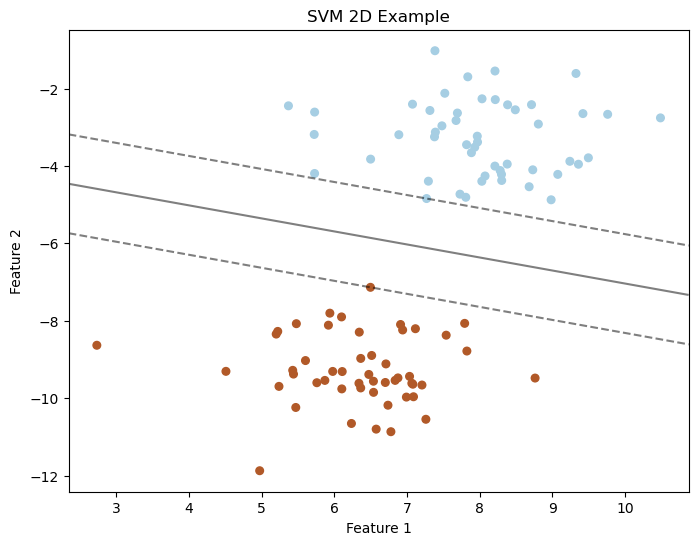

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Gerando dados para SVM 2D
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Modelo SVM para os dados 2D
svm_2d = SVC(kernel='linear')
svm_2d.fit(X, y)

# Plotando o SVM 2D
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Desenhando o hiperplano
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Criando grid para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_2d.decision_function(xy).reshape(XX.shape)

# Desenhando a margem e o hiperplano
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title("SVM 2D Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Explicação do Gráfico SVM 2D

## Visão Geral do SVM 2D
O gráfico demonstra um exemplo clássico do uso de Support Vector Machine (SVM) para classificação em duas dimensões.

## Componentes Principais
1. **Hiperplano:**
   - No gráfico 2D, o hiperplano é representado por uma linha reta.
   - Esta linha é a fronteira de decisão que separa as duas classes de dados.

2. **Margem:**
   - A margem é a área ao redor do hiperplano onde não há pontos de dados.
   - É a distância entre o hiperplano e os pontos de dados mais próximos de cada classe.
   - As linhas pontilhadas no gráfico representam as bordas da margem.

3. **Vetores de Suporte:**
   - Os vetores de suporte são os pontos de dados mais próximos do hiperplano.
   - Estes pontos são cruciais para definir a posição e orientação do hiperplano.
   - No gráfico, eles podem ser identificados como os pontos mais próximos das linhas pontilhadas.

## Importância do Gráfico
- Este gráfico oferece uma visualização intuitiva de como o SVM classifica dados em duas dimensões.
- Ele mostra a eficácia do SVM em criar uma fronteira de decisão clara, maximizando a margem entre as classes.

In [ ]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
# Gerando dados para SVM 3D
X_3d, y_3d = datasets.make_classification(n_features=3, n_redundant=0, n_informative=3, n_classes=2)


# Preparando os dados para o plot 3D com Plotly
pca = PCA(n_components=3)  # Reduzindo para 3 componentes para visualização
X_3d_pca = pca.fit_transform(X_3d)

# Ajustando o modelo SVM
model = SVC(kernel='linear')
model.fit(X_3d_pca, y_3d)

# Coordenadas do hiperplano
coef = model.coef_[0]
intercept = model.intercept_
xx, yy = np.meshgrid(np.linspace(X_3d_pca[:, 0].min(), X_3d_pca[:, 0].max(), 50), 
                     np.linspace(X_3d_pca[:, 1].min(), X_3d_pca[:, 1].max(), 50))
zz = (-coef[0] * xx - coef[1] * yy - intercept[0]) / coef[2]

# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Adicionando os pontos de dados
fig.add_trace(go.Scatter3d(x=X_3d_pca[:, 0], y=X_3d_pca[:, 1], z=X_3d_pca[:, 2],
                           mode='markers', marker=dict(color=y_3d, size=5, colorscale='Viridis')))

# Adicionando o hiperplano
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, colorscale='Blues', showscale=False, opacity=0.5))

# Atualizando o layout do gráfico
fig.update_layout(title="3D SVM Hyperplane", margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))

# Mostrando o gráfico
fig.show()



# Explicação do Gráfico SVM 3D

## Visão Geral do SVM 3D
O gráfico 3D ilustra a aplicação do SVM (Support Vector Machine) em um espaço tridimensional para classificação.

## Hiperplano em 3D
1. **Representação do Hiperplano:**
   - No gráfico 3D, o hiperplano é uma superfície plana que divide o espaço em duas partes.
   - Este hiperplano separa os pontos de dados de duas classes distintas.

2. **Funcionalidade do Hiperplano:**
   - O objetivo do hiperplano é maximizar a distância entre si e os pontos de dados mais próximos de cada classe.
   - A posição e orientação do hiperplano são determinadas de maneira a criar a maior separação possível entre as duas classes.

## Importância do Gráfico 3D
- O gráfico 3D fornece uma perspectiva mais profunda sobre como o SVM funciona em espaços de maior dimensão.
- Ele demonstra a capacidade do SVM de lidar com dados complexos que não são linearmente separáveis em espaços bidimensionais.

# Tipos de Support Vector Machine (SVM)

## Introdução
Existem diferentes tipos de SVM que são utilizados de acordo com a natureza do problema de dados. Vamos explorar os dois tipos principais: SVM Linear e SVM Não-linear.

## SVM Linear
1. **Definição:**
   - Utilizado quando os dados são linearmente separáveis, ou seja, podem ser separados por uma linha reta (em 2D) ou um plano (em 3D).

2. **Aplicação:**
   - Ideal para conjuntos de dados simples onde a distinção entre as classes é clara e direta.

## SVM Não-linear
1. **Definição:**
   - Utilizado quando os dados não são linearmente separáveis.
   - Nestes casos, o SVM utiliza o que é conhecido como 'kernel trick' para transformar os dados em um espaço de dimensão superior onde eles se tornam separáveis.

## Fundamentos do Kernel Trick
1. **Transformação de Espaço:**
   - Em muitos problemas de classificação, os dados não são linearmente separáveis no espaço original.
   - O kernel trick permite que esses dados sejam transformados em um espaço de dimensão superior onde se tornam linearmente separáveis.

2. **Como Funciona:**
   - Ao invés de realizar a transformação dos dados explicitamente, o kernel trick modifica o produto escalar no espaço original.
   - Isso permite que o SVM opere em um espaço de maior dimensão sem a necessidade de computar as coordenadas dos dados neste espaço.

3. **Tipos de Kernels:**
   - **Linear**: Para dados linearmente separáveis.
   - **Polinomial**: Para relações polinomiais mais complexas entre as características.
   - **RBF (Radial Basis Function)**: Muito eficaz para casos onde a relação entre as características não é linear.

## Importância do Kernel Trick
- Permite o tratamento de dados não linearmente separáveis, aumentando significativamente a flexibilidade e aplicabilidade do SVM.
- Torna possível a aplicação do SVM em uma ampla variedade de problemas de classificação.

## Escolha do Kernel

Ao trabalhar com SVMs, a escolha do kernel é fundamental e deve ser feita com base na natureza dos dados e no problema específico. Cada kernel tem características únicas que o tornam adequado para certos tipos de dados e padrões. Experimentar com diferentes kernels é essencial para encontrar o modelo mais eficaz.

### Kernels Comuns e Suas Peculiaridades
1. **Linear:**
   - **Uso:** Para dados que são linearmente separáveis.
   - **Característica:** Simples e rápido, ideal para conjuntos de dados grandes e esparsos.

2. **Polinomial:**
   - **Uso:** Para dados que seguem uma relação polinomial.
   - **Característica:** Flexível com a capacidade de modelar interações complexas entre características.

3. **RBF (Radial Basis Function) ou Gaussian:**
   - **Uso:** Para dados que não são linearmente separáveis e seguem uma distribuição complexa.
   - **Característica:** Muito eficaz para espaços de alta dimensão, capaz de criar fronteiras de decisão não lineares.

4. **Sigmoid:**
   - **Uso:** Semelhante a uma função de ativação de rede neural, útil em certas condições.
   - **Característica:** Pode converter dados não lineares em um formato que pode ser linearmente separado, mas requer cuidado na escolha dos parâmetros.

### Dicas para a Escolha do Kernel
- Inicie com o kernel linear para uma linha de base simples.
- Experimente kernels polinomiais e RBF para dados mais complexos.
- Ajuste os parâmetros de cada kernel (como grau para polinomial, gamma para RBF) para otimizar o desempenho.
- Considere a natureza dos seus dados e o problema que você está tentando resolver.

Lembrando que a escolha adequada do kernel pode significativamente melhorar a performance do seu modelo SVM.


# Exemplo Prático: SVM Não-linear com Kernel RBF

## Geração dos Dados
- Utilizamos a função `make_circles` do `sklearn.datasets` para criar um conjunto de dados não-linearmente separáveis.
- Os dados gerados formam dois círculos concêntricos, representando um desafio clássico para classificação linear.

## Modelo SVM com Kernel RBF
- Implementamos um modelo SVM (`SVC`) usando o kernel RBF (Radial Basis Function).
- O kernel RBF é particularmente eficaz para dados complexos e não-linearmente separáveis.
- Definimos os parâmetros `C` (regularização) e `gamma` (definindo a influência de um único ponto de treinamento).

## Preparação do Gráfico de Contorno
- Criamos um grid sobre o espaço de características usando `numpy.meshgrid`.
- Este grid serve para visualizar a área de decisão do modelo SVM.

## Plotando o Gráfico
- Realizamos previsões com o modelo treinado em todo o grid para determinar as áreas de decisão.
- Utilizamos `matplotlib.pyplot` para plotar um gráfico de contorno, mostrando as regiões de classificação (áreas coloridas).
- Os pontos de dados são plotados com cores representando suas classes reais.

## Resultado e Interpretação
- O gráfico ilustra a eficácia do SVM com kernel RBF na separação de dados não-linearmente separáveis.
- As áreas coloridas no gráfico representam as regiões onde o modelo SVM classifica os pontos de dados, demonstrando sua habilidade em lidar com padrões complexos de dados.

Este exemplo prático mostra a capacidade do SVM Não-linear com kernel RBF de classificar dados que não podem ser separados linearmente, fornecendo uma visualização clara da potência e flexibilidade deste método em Machine Learning.


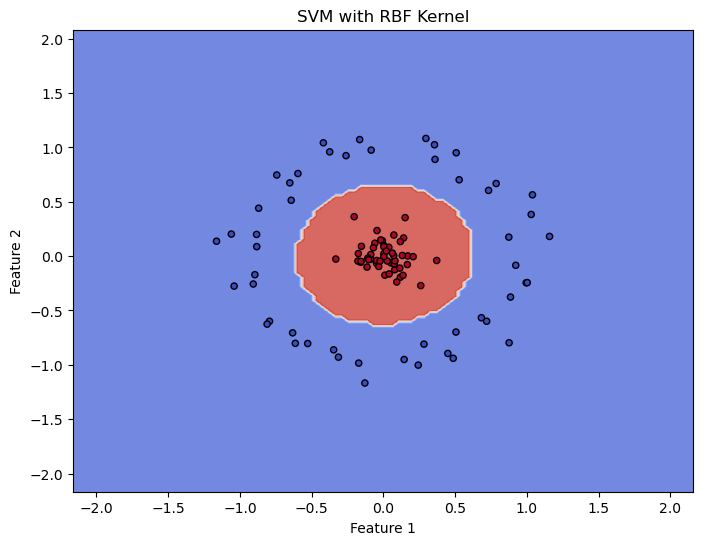

In [5]:
# Exemplo Prático: SVM Não-linear com Kernel RBF

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Gerando dados não-linearmente separáveis
X, y = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

# Modelo SVM com kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma='auto')
svm_rbf.fit(X, y)

# Grid para o gráfico de contorno
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Previsões no grid para o contorno
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Parâmetros C e Gamma em SVM com Kernel RBF

Ao configurar um modelo SVM (Support Vector Machine) com o kernel RBF (Radial Basis Function), dois parâmetros cruciais são `C` e `gamma`. Entender como ajustá-los é essencial para otimizar o desempenho do modelo.

## Parâmetro C (Regularização)
- **Função**: Controla a trade-off entre obter uma fronteira de decisão suave e classificar corretamente todos os pontos de treinamento.
- **Valores Baixos**: 
   - Um `C` baixo (por exemplo, 0.1) aumenta a tolerância a erros e resulta em um modelo com alta viés e baixa variância.
   - Pode levar a subajuste (underfitting), onde o modelo é simples demais para capturar a complexidade dos dados.
- **Valores Altos**: 
   - Um `C` alto (por exemplo, 100) pressiona o modelo a classificar todos os exemplos de treinamento corretamente, com baixa tolerância a erros.
   - Pode causar sobreajuste (overfitting), onde o modelo se ajusta demais aos dados de treino e perde a capacidade de generalizar.

## Parâmetro Gamma (Kernel RBF)
- **Função**: Determina a distância de influência de um único ponto de treinamento.
- **Valores Baixos**: 
   - Um `gamma` baixo (por exemplo, 0.01) significa uma influência de longo alcance, levando a uma fronteira de decisão mais suave.
   - Ideal para quando os pontos de dados estão distribuídos amplamente.
- **Valores Altos**: 
   - Um `gamma` alto (por exemplo, 1) implica uma influência mais localizada dos pontos de treinamento.
   - Pode levar a uma fronteira de decisão complexa, ajustando-se demais aos dados.

## Boas Práticas na Escolha de C e Gamma
- **Teste e Validação**: Utilize técnicas como validação cruzada e busca em grade (grid search) para experimentar diferentes combinações de `C` e `gamma`.
- **Comece com Valores Padrão**: Inicie com valores padrões ou moderados e ajuste conforme necessário.
- **Balanceamento**: Equilibre a complexidade do modelo e a capacidade de generalização, evitando valores extremos sem justificativa.

A escolha cuidadosa de `C` e `gamma` é fundamental para obter um modelo SVM eficaz, especialmente ao lidar com dados complexos e não linearmente separáveis.


# Redes Neurais e Perceptron

## Introdução às Redes Neurais
Redes neurais são fundamentos da aprendizagem profunda e são inspiradas na estrutura e funcionamento do cérebro humano.

## Estrutura Básica
1. **Neurônios:**
   - Unidades básicas de processamento, semelhantes aos neurônios do cérebro humano.
   - Cada neurônio recebe vários sinais de entrada, processa-os e envia um sinal de saída.

2. **Camadas:**
   - As redes neurais são formadas por camadas de neurônios: camada de entrada, camadas ocultas e camada de saída.
   - Cada camada contém vários neurônios que estão interconectados.

## O Modelo do Perceptron
1. **O que é um Perceptron?**
   - Um perceptron é a forma mais simples de uma rede neural: um único neurônio com ajuste de pesos e um limiar.
   - É usado principalmente para tarefas de classificação linear.

2. **Funcionamento do Perceptron:**
   - Recebe entradas, multiplica-as por pesos, soma tudo e passa o resultado por uma função de ativação para produzir a saída.

3. **Limitações:**
   - O perceptron simples é limitado a separar dados que são linearmente separáveis.
   - Problemas mais complexos exigem redes neurais com múltiplas camadas e neurônios.

## Aprendizagem em Redes Neurais
- A aprendizagem envolve ajustar os pesos dos neurônios com base nos dados de entrada e no erro de saída.
- Métodos como o **backpropagation** são usados para treinar redes neurais em problemas complexos.

## Aplicações Práticas
- Redes neurais são usadas em uma variedade de aplicações, como reconhecimento de imagem, processamento de linguagem natural e muito mais.

# Estrutura Básica de uma Rede Neural

## Visão Geral
Uma rede neural é uma série de algoritmos que tentam reconhecer relações subjacentes em um conjunto de dados por meio de um processo que imita o funcionamento do cérebro humano.

## Componentes-chave
1. **Neurônios:**
   - **Definição**: Também conhecidos como nós, são unidades de processamento que recebem entradas e geram saídas.
   - **Funcionamento**: Cada neurônio recebe entradas, as processa aplicando uma função de ativação e gera uma saída.

2. **Camadas:**
   - **Camada de Entrada**: Onde os dados são recebidos pela rede.
   - **Camadas Ocultas**: Camadas intermediárias onde ocorre a maior parte do processamento através de uma combinação linear dos inputs.
   - **Camada de Saída**: Onde as saídas finais são geradas.
    - Regressão: Função de ativação linear e apenas 1 neurônio
    - Classificação Binária: Função de ativação sigmoidal e apenas 1 neurônio
    - Classificação MultiClasse: Função de ativação Softmax e 1 neurônio para cada classe

3. **Pesos:**
   - **Importância**: Os pesos determinam a importância das entradas para os neurônios.
   - **Ajuste**: Durante o treinamento, os pesos são ajustados para melhorar a precisão da rede.

## Processo de Aprendizagem
- A rede aprende ajustando os pesos com base no erro das previsões.
- Técnicas como o **backpropagation** e **gradient descent** são usadas para otimizar esses pesos.

# O Modelo do Perceptron: Funcionamento e Limitações

## O Perceptron: Uma Visão Geral
O perceptron é um dos modelos mais simples de rede neural, frequentemente usado para classificação binária.

## Funcionamento do Perceptron
1. **Estrutura Básica:**
   - Constituído por um único neurônio com múltiplas entradas e uma saída.
   - Cada entrada tem um peso associado e um limiar (bias) é aplicado.

2. **Processo de Decisão:**
   - O neurônio calcula a soma ponderada das entradas.
   - Aplica uma função de ativação (geralmente uma função degrau) para produzir uma saída binária.

3. **Exemplo de Funcionamento:**
   - Dados de entrada são multiplicados pelos respectivos pesos, somados e então comparados com um limiar.
   - Se a soma ponderada for maior que o limiar, a saída é 1; caso contrário, é 0.

## Limitações do Perceptron
1. **Linearidade:**
   - O perceptron só pode classificar dados linearmente separáveis.
   - Incapaz de resolver problemas onde os dados não podem ser separados por uma linha reta, como o problema XOR.

2. **Complexidade de Problemas:**
   - Não é adequado para problemas complexos que requerem redes com múltiplas camadas.

## Importância Histórica
- O perceptron foi fundamental no desenvolvimento inicial das redes neurais e no entendimento de como um neurônio artificial pode funcionar..


# Introdução à Aprendizagem em Redes Neurais: Feedforward e Backpropagation

## Feedforward
1. **Definição:**
   - O processo de feedforward é o fluxo de entrada de dados através da rede para gerar uma saída.
   - Os dados de entrada passam por cada camada da rede, onde são processados pelos neurônios.

2. **Funcionamento:**
   - Em cada neurônio, a entrada é somada e passada por uma função de ativação.
   - O resultado é então passado para a próxima camada até chegar à camada de saída.

3. **Importância:**
   - É o processo básico de como uma rede neural faz previsões ou classificações.

## Backpropagation
1. **Definição:**
   - Backpropagation é um método usado para calcular o gradiente, que é necessário para ajustar os pesos da rede.
   - É essencial para o processo de aprendizado e otimização da rede.

2. **Funcionamento:**
   - Após o feedforward, a rede compara a saída com o resultado esperado e calcula o erro.
   - O erro é então propagado de volta pela rede, ajustando os pesos para minimizar esse erro.

3. **Importância:**
   - Permite que a rede aprenda com seus erros, ajustando-se para melhorar o desempenho.

# Normalização de Dados para SVM

## Importância da Normalização

A normalização dos dados é crucial no treinamento de modelos de Máquina de Vetor de Suporte (SVM). SVMs são sensíveis à escala das características devido à maneira como o algoritmo maximiza a margem entre as classes. Se uma característica possui uma escala muito maior em comparação com outras, ela pode dominar o critério de decisão, levando a um desempenho subótimo do modelo.

## Escolha entre StandardScaler e MinMaxScaler

### StandardScaler

- **Uso**: Ideal para dados que seguem uma distribuição próxima da normal (Gaussiana).
- **Funcionamento**: Remove a média e divide pela variância, resultando em dados com média zero e variância unitária.
- **Vantagens**: Menos sensível a outliers.
- **Cenários Recomendados**: Quando os dados têm características com distribuições normais ou quando a robustez a outliers é importante.

### MinMaxScaler

- **Uso**: Recomendado para casos em que os valores precisam ser limitados dentro de um intervalo específico (por exemplo, 0 a 1).
- **Funcionamento**: Transforma os dados para que caibam em um intervalo definido, geralmente entre 0 e 1.
- **Vantagens**: Mantém relações de escala e espaçamento originais.
- **Cenários Recomendados**: Quando os dados não seguem uma distribuição normal e não há outliers significativos.

A escolha entre StandardScaler e MinMaxScaler depende da natureza dos dados e dos requisitos específicos do modelo e da aplicação. Experimentar ambos e comparar os resultados pode ser uma estratégia eficaz para determinar o melhor método de normalização para um conjunto de dados específico.

In [34]:
import pandas as pd
df = pd.read_csv('risco_fatura.csv')
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,alvo
0,144,6,582,2,723,2,0.0,0.0,0.0,0.000000,...,-1.0,160.0,1.000000,24.0,41941.0,182.0,0.049087,0.050336,0.056529,1
1,70,8,365,4,4265,3,0.0,0.0,0.0,2.176599,...,-1.0,203.0,1.000000,33.0,22170.0,180.0,1.000000,1.000000,1.000000,1
2,143,6,682,5,1244,2,0.0,0.0,0.0,0.000000,...,-1.0,159.0,1.000000,35.0,86512.0,144.0,1.000000,1.000000,1.000000,1
3,96,14,844,2,3536,2,0.0,0.0,0.0,2.112387,...,-1.0,162.0,0.036783,28.0,51808.0,411.0,0.087850,0.090118,0.106292,1
4,91,8,658,4,2978,2,0.0,0.0,0.0,0.000000,...,-1.0,-1.0,0.000000,4.0,506.0,-1.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,70,14,365,4,4271,3,0.0,0.0,0.0,2.151104,...,-1.0,173.0,1.000000,35.0,7240.0,189.0,1.000000,1.000000,1.000000,0
59996,35,0,366,0,4312,2,0.0,0.0,0.0,0.000000,...,-1.0,-1.0,0.000000,1.0,141.0,-1.0,0.000000,0.000000,0.000000,0
59997,207,8,366,5,4310,2,0.0,0.0,0.0,2.138615,...,-1.0,172.0,1.000000,29.0,45878.0,580.0,0.250086,0.115127,0.123476,0
59998,207,0,366,0,4293,2,0.0,0.0,0.0,2.305405,...,-1.0,244.0,1.000000,25.0,78872.0,214.0,0.069679,0.037577,0.041278,0


In [35]:
df[['alvo']].value_counts()

alvo
0       30000
1       30000
dtype: int64

In [3]:
X = df.drop('alvo', axis = 1)
y = df['alvo']

In [4]:
#Separa os dados em treinamento, validação e teste
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_0,60000.0,1.222896e+02,6.805144e+01,0.000,68.00000,1.000000e+02,2.070000e+02,2.220000e+02
col_1,60000.0,5.773917e+00,5.429192e+00,0.000,0.00000,6.000000e+00,8.000000e+00,1.800000e+01
col_2,60000.0,4.909764e+02,1.749097e+02,0.000,366.00000,3.660000e+02,6.820000e+02,9.270000e+02
col_3,60000.0,2.234283e+00,2.087247e+00,0.000,0.00000,2.000000e+00,4.000000e+00,6.000000e+00
col_4,60000.0,3.085959e+03,1.475876e+03,-1.000,1371.00000,4.259000e+03,4.301000e+03,4.672000e+03
col_5,60000.0,2.191400e+00,5.073168e-01,-1.000,2.00000,2.000000e+00,2.000000e+00,3.000000e+00
col_6,60000.0,2.204769e-01,2.971271e+00,0.000,0.00000,0.000000e+00,0.000000e+00,3.110000e+02
col_7,60000.0,2.655646e-01,3.126864e+00,0.000,0.00000,0.000000e+00,0.000000e+00,2.170445e+02
col_8,60000.0,9.577058e-01,7.866235e+00,0.000,0.00000,0.000000e+00,0.000000e+00,3.110140e+02
col_9,60000.0,3.346357e-01,7.865428e-01,0.000,0.00000,0.000000e+00,0.000000e+00,3.090968e+00


In [5]:
# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
X_val = scaler_x.transform(X_val)


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Criação do modelo SVM
# Você pode ajustar os hiperparâmetros como 'C' e 'kernel' manualmente.
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Treinamento do modelo com os dados de treinamento
svm_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7464
           1       0.97      0.96      0.96      7536

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output

# Definindo a arquitetura da rede neural
model = Sequential()
# Primeira camada oculta com 64 neurônios e função de ativação 'relu'.
# A camada de entrada tem o mesmo número de neurônios que o número de características (54).
model.add(Dense(64, activation='relu', input_shape=(54,)))
# Segunda camada oculta
model.add(Dense(64, activation='relu'))
# Camada de saída com ativação 'sigmoid' para classificação binária.
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
# Usamos o otimizador 'adam' e a função de perda 'binary_crossentropy' para classificação binária.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
# Usamos X_train e y_train com um número definido de épocas.
# A validação durante o treinamento é feita usando X_val e y_val.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
clear_output(wait=True)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1921 - accuracy: 0.9225 - val_loss: 0.1254 - val_accuracy: 0.9610
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1187 - accuracy: 0.9591 - val_loss: 0.1158 - val_accuracy: 0.9637
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1083 - accuracy: 0.9637 - val_loss: 0.1077 - val_accuracy: 0.9657
Epoch 4/20
938/938 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9653 - val_loss: 0.1020 - val_accuracy: 0.9661
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0971 - accuracy: 0.9676 - val_loss: 0.1094 - val_accuracy: 0.9626
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0925 - accuracy: 0.9687 - val_loss: 0.1084 - val_accuracy: 0.9615
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0883 - accuracy: 0.9705 - val_loss: 0.0974 - val_accuracy: 0.9667
Epoch 

# Comparando os modelos

In [15]:
# 'y_test_pred' contém as probabilidades preditas pela rede neural
y_test_pred = model.predict(X_test)
y_test_pred

469/469 [==============================] - 1s 1ms/step


array([[9.8706371e-01],
       [2.3269084e-04],
       [3.0556268e-05],
       ...,
       [9.9878925e-01],
       [9.9118668e-01],
       [9.9855894e-01]], dtype=float32)

In [16]:
# Converter probabilidades em rótulos de classe 0 ou 1
# Usamos um limiar de 0.5
y_test_pred = (y_test_pred > 0.5).astype(int)
y_test_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [17]:
# Transforma em 1 único array
y_test_pred = y_test_pred.flatten()
y_test_pred

array([1, 0, 0, ..., 1, 1, 1])

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7464
           1       0.97      0.98      0.97      7536

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [22]:
# Avaliação do modelo com os dados de teste do SVM
y_test_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7464
           1       0.97      0.96      0.96      7536

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [21]:
y_test_pred_svm

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)